In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

path = '/nfs/public/rw/homes/uni_adm/tmp/log_parsing/offset/merged.json'

def read_json_file(json_file):
    with open(json_file) as f:
        return json.load(f)

offset_counts = read_json_file(path)
offset_counts['-25'] = offset_counts['not_specified']
del offset_counts['not_specified']
list_offset_counts = [{'offset':int(offset), 'count': int(count)} for offset, count in offset_counts.items()]
df = pd.DataFrame(list_offset_counts)
df = df[df['offset'] % 25 == 0]
df = df.sort_values('offset', ascending=True)
df.reset_index(drop=True)
df['%queries'] = 100*df['count']/sum(df['count'])
threshold = 2000
significant = df['offset'] <= threshold
other = df['offset'] > threshold
df_significant = df[significant].copy()
df_other = pd.DataFrame([{
    'count':sum(df.loc[other, 'count']),
    'offset': threshold + 25,
    '%queries': sum(df.loc[other, '%queries']),
}])
df_summary = pd.concat([df_significant, df_other], sort=False)
df_summary = df_summary.reset_index(drop=True)
f = lambda offset: max(0, offset/25)
df_summary['≈pages'] = df_summary['offset'].apply(f)
df_summary['Σ%queries'] = df_summary['%queries'].cumsum()
df_summary['%queries'] = df_summary['%queries'].map('{:,.2f}'.format)
df_summary['≈pages'] = df_summary['≈pages'].map('{:,.0f}'.format)
df_summary['Σ%queries'] = df_summary['Σ%queries'].map('{:,.2f}'.format)
i = df_summary.index[-1]
df_summary = df_summary.astype({'offset': str})
df_summary.at[i, '≈pages'] = '≥' + df_summary.at[i, '≈pages']
df_summary.at[i, 'offset'] = '≥' + df_summary.at[i, 'offset']
i = df_summary.index[0]
df_summary.at[i, 'offset'] = 'not specified'
df_summary = df_summary[['count', 'offset','≈pages','%queries', 'Σ%queries']]
df_summary

,count,offset,≈pages,%queries,Σ%queries
0,11151329,not specified,0,95.76,95.76
1,29953,0,0,0.26,96.02
2,149179,25,1,1.28,97.30
3,63536,50,2,0.55,97.85
4,34860,75,3,0.30,98.15
5,26767,100,4,0.23,98.38
6,16072,125,5,0.14,98.52
7,12021,150,6,0.10,98.62
8,8684,175,7,0.07,98.69
9,8836,200,8,0.08,98.77


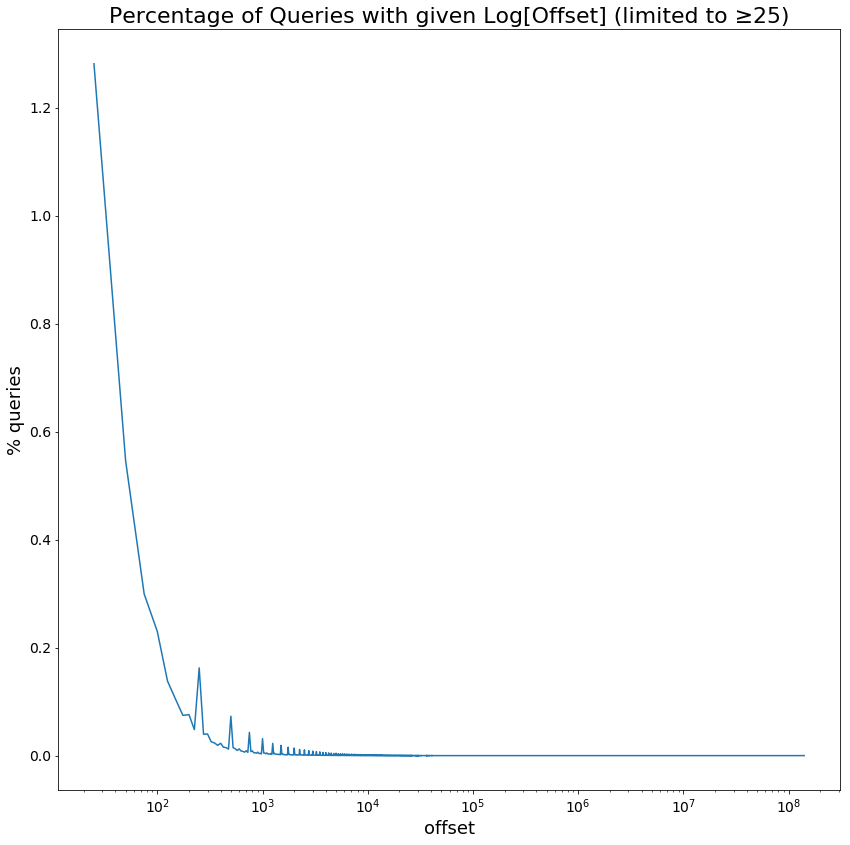

In [2]:
df_nonzero = df[df['offset'] > 0]
fig, ax = plt.subplots(1,1, figsize=(14, 14))
df_nonzero.plot(x='offset', y='%queries', logx=True, fontsize=14, legend=False, ax=ax)
ax.set_xlabel('offset',fontsize=18)
ax.set_ylabel('% queries',fontsize=18)
ax.set_title(f'Percentage of Queries with given Log[Offset] (limited to ≥25)', fontsize=22);

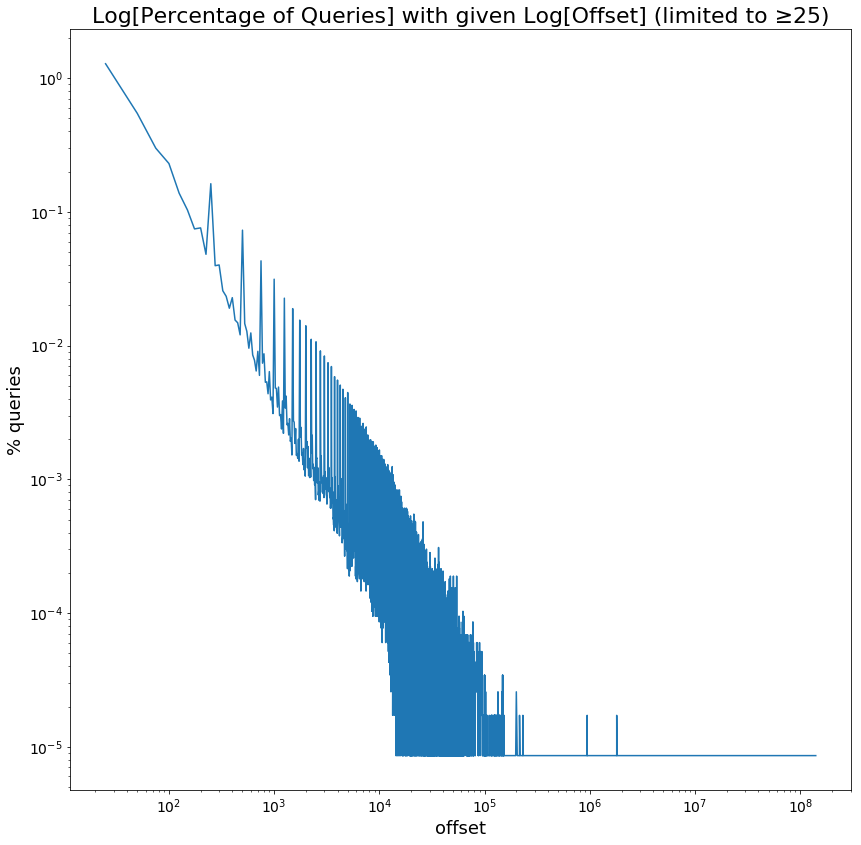

In [3]:
fig, ax = plt.subplots(1,1, figsize=(14, 14))
df_nonzero.plot(x='offset', y='%queries', loglog=True, fontsize=14, legend=False, ax=ax)
ax.set_xlabel('offset',fontsize=18)
ax.set_ylabel('% queries',fontsize=18)
ax.set_title(f'Log[Percentage of Queries] with given Log[Offset] (limited to ≥25)', fontsize=22);